In [1]:
!pip install transformers==4.11.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.7 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=048cc769105eb32b910c31041769d68995e11500c29f6489d4c0b74aff967009
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [2]:
!pip install lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.5/553.5 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
! pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import json
import pandas as pd
import numpy as np
import torch
from pathlib import Path
import lightning as pl

In [5]:
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

In [6]:
from torch.utils.data import Dataset, DataLoader
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import ModelCheckpoint

from lightning.pytorch.loggers import TensorBoardLogger
from transformers import AdamW, T5ForConditionalGeneration, T5TokenizerFast as T5Tokenizer
from tqdm.auto import tqdm

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pl.seed_everything(1234)

INFO: Global seed set to 1234
INFO:lightning.fabric.utilities.seed:Global seed set to 1234


1234

In [9]:
df = pd.read_csv("/content/drive/MyDrive/news_summary.csv", encoding="latin-1")
df.head()

author                  date  \
0        Chhavi Tyagi  03 Aug 2017,Thursday   
1         Daisy Mowke  03 Aug 2017,Thursday   
2      Arshiya Chopra  03 Aug 2017,Thursday   
3       Sumedha Sehra  03 Aug 2017,Thursday   
4  Aarushi Maheshwari  03 Aug 2017,Thursday   

                                           headlines  \
0  Daman & Diu revokes mandatory Rakshabandhan in...   
1  Malaika slams user who trolled her for 'divorc...   
2  'Virgin' now corrected to 'Unmarried' in IGIMS...   
3  Aaj aapne pakad liya: LeT man Dujana before be...   
4  Hotel staff to get training to spot signs of s...   

                                           read_more  \
0  http://www.hindustantimes.com/india-news/raksh...   
1  http://www.hindustantimes.com/bollywood/malaik...   
2  http://www.hindustantimes.com/patna/bihar-igim...   
3  http://indiatoday.intoday.in/story/abu-dujana-...   
4  http://indiatoday.intoday.in/story/sex-traffic...   

                                                text  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                               ctext  
0  The Daman and Diu administration on Wednesday ...  
1  From her special numbers to TV?appearances, Bo...  
2  The Indira Gandhi Institute of Medical Science...  
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...  
4  Hotels in Mumbai and other Indian cities are t...

In [10]:
df.shape

(4514, 6)

In [11]:
df = df[['text', 'ctext']]
df.head()

text  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                               ctext  
0  The Daman and Diu administration on Wednesday ...  
1  From her special numbers to TV?appearances, Bo...  
2  The Indira Gandhi Institute of Medical Science...  
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...  
4  Hotels in Mumbai and other Indian cities are t...

In [12]:
df.columns = ['summary', 'text']
df = df.dropna()
df.head()

summary  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                                text  
0  The Daman and Diu administration on Wednesday ...  
1  From her special numbers to TV?appearances, Bo...  
2  The Indira Gandhi Institute of Medical Science...  
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...  
4  Hotels in Mumbai and other Indian cities are t...

In [13]:
df.shape

(4396, 2)

In [14]:
train_df, test_df = train_test_split(df, test_size=0.1)
print(f"Shape of the Train Set: {train_df.shape}\nShape of the Test Set: {test_df.shape}")

Shape of the Train Set: (3956, 2)
Shape of the Test Set: (440, 2)


In [15]:
class TextSumDataset(Dataset):
    def __init__(self, data, tokenizer, text_max_token_len=512, summary_max_token_len=128):
        """
        A dataset that represents news articles and their respective summaries.

        Args:
        - data (pd.DataFrame): The data that contains the news articles and their summaries.
        - tokenizer (transformers.tokenization_*) : The tokenizer used to tokenize the text and summary.
        - text_max_token_len (int, optional): The maximum length of the text in terms of tokens. Defaults to 512.
        - summary_max_token_len (int, optional): The maximum length of the summary in terms of tokens. Defaults to 128.
        """
        self.tokenizer = tokenizer
        self.data = data
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len
        
    def __len__(self):
        """
        Returns:
        - The number of samples in the dataset.
        """
        return len(self.data)
    
    def __getitem__(self, index):
        """
        Get a sample from the dataset.

        Args:
        - index (int): The index of the sample to get.

        Returns:
        - A dictionary that contains the following:
            - text (str): The original text of the news article.
            - summary (str): The summary of the news article.
            - text_input_ids (torch.Tensor): The input IDs of the text after tokenization.
            - text_attention_mask (torch.Tensor): The attention mask of the text after tokenization.
            - labels (torch.Tensor): The input IDs of the summary after tokenization.
            - labels_attention_mask (torch.Tensor): The attention mask of the summary after tokenization.
        """
        data_row = self.data.iloc[index]
        text = data_row["text"]

        # Encode the text
        text_encoding = self.tokenizer(
            text, 
            max_length=self.text_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt"
        )

        # Encode the summary
        summary_encoding = self.tokenizer(
            data_row["summary"], 
            max_length=self.summary_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt"
        )

        # Modify the labels so that the model knows which tokens to predict
        labels = summary_encoding['input_ids']
        labels[labels == 0] = -100
        
        return {
            'text': text,
            'summary': data_row['summary'],
            'text_input_ids': text_encoding['input_ids'].flatten(),
            'text_attention_mask': text_encoding['attention_mask'].flatten(),
            'labels': labels.flatten(),
            'labels_attention_mask': summary_encoding["attention_mask"].flatten()
        }

In [16]:
class TextSumDataModule(pl.LightningDataModule):
    def __init__(self,
                 train_df,
                 test_df,
                 tokenizer,
                 batch_size=8,
                 text_max_token_len=512,
                 summary_max_token_len=128):
        """
        Initializes the TextSumDataModule.
        
        Args:
        - train_df (pandas.DataFrame): the training dataset
        - test_df (pandas.DataFrame): the testing dataset
        - tokenizer (transformers.PreTrainedTokenizer): the tokenizer to be used
        - batch_size (int): the batch size
        - text_max_token_len (int): the maximum number of tokens for the text
        - summary_max_token_len (int): the maximum number of tokens for the summary
        """
        super().__init__()
        
        self.train_df = train_df
        self.test_df = test_df
        
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len
    
    def setup(self, stage=None):
        """
        Sets up the dataset.
        """
        self.train_dataset = TextSumDataset(
            self.train_df,
            self.tokenizer,
            self.text_max_token_len,
            self.summary_max_token_len)
        
        self.test_dataset = TextSumDataset(
            self.test_df,
            self.tokenizer,
            self.text_max_token_len,
            self.summary_max_token_len)
    
    def train_dataloader(self):
        """
        Returns the DataLoader for the training set.
        """
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True
        )
    
    def test_dataloader(self):
        """
        Returns the DataLoader for the testing set.
        """
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False
        )
    
    def val_dataloader(self):
        """
        Returns the DataLoader for the validation set, which is the same as the testing set.
        """
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False
        )

In [17]:
MODEL_NAME = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

In [18]:
text_token_counts = [len(tokenizer.encode(row["text"])) for _, row in train_df.iterrows()]
summary_token_counts = [len(tokenizer.encode(row["summary"])) for _, row in train_df.iterrows()]

Token indices sequence length is longer than the specified maximum sequence length for this model (639 > 512). Running this sequence through the model will result in indexing errors


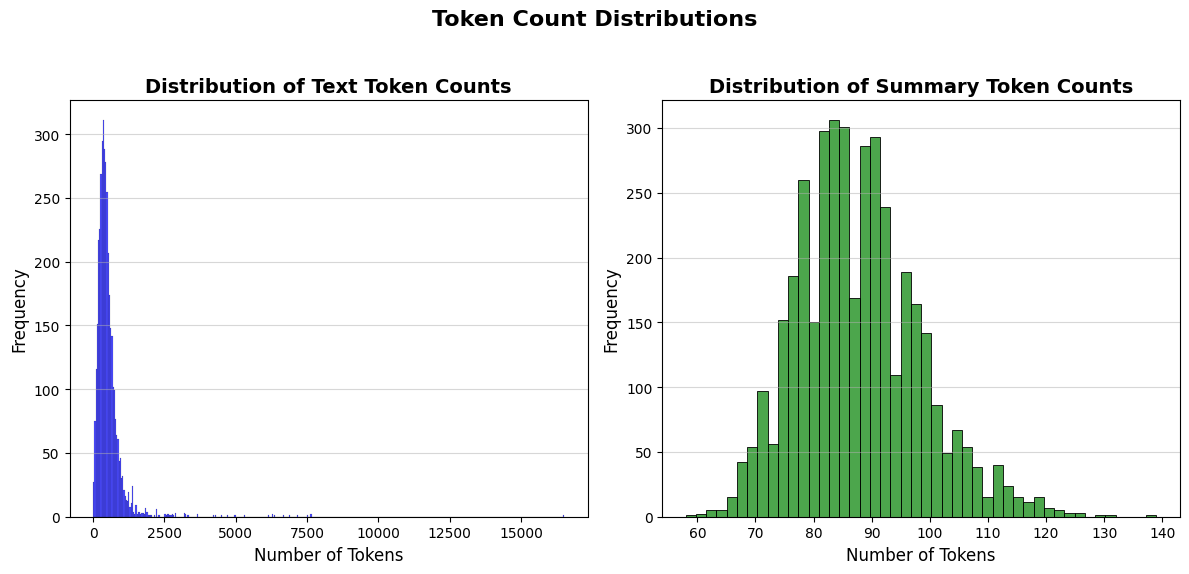

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(text_token_counts, ax=ax1, color='blue', alpha=0.7)
ax1.set_title("Distribution of Text Token Counts", fontsize=14, fontweight='bold')
ax1.set_xlabel("Number of Tokens", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.grid(axis='y', alpha=0.5)

sns.histplot(summary_token_counts, ax=ax2, color='green', alpha=0.7)
ax2.set_title("Distribution of Summary Token Counts", fontsize=14, fontweight='bold')
ax2.set_xlabel("Number of Tokens", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.grid(axis='y', alpha=0.5)

plt.suptitle("Token Count Distributions", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
N_EPOCHS = 3
BATCH_SIZE= 8

data_module = TextSumDataModule(
    train_df, 
    test_df,
    tokenizer,
    batch_size=BATCH_SIZE
    
)

In [21]:
from sklearn.metrics import accuracy_score

class SummaryModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict=True)
        self.training_step_outputs = []
        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.on_train_epoch_end_outputs = []
        self.on_validation_epoch_end_outputs = []
        self.on_test_epoch_end_outputs = []

    def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
        output = self.model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels,
            decoder_attention_mask=decoder_attention_mask
        )
        return output.loss, output.logits

    def shared_step(self, batch, batch_idx):
        input_ids = batch['text_input_ids']
        attention_mask = batch["text_attention_mask"]
        labels = batch["labels"]
        labels_attention_mask = batch["labels_attention_mask"]

        loss, logits = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels
        )

        preds = torch.argmax(logits, dim=-1).cpu().flatten()
        labels = labels.cpu().flatten()
        accuracy = accuracy_score(labels, preds)
        
        return loss, accuracy

    def training_step(self, batch, batch_idx):
        loss, accuracy = self.shared_step(batch, batch_idx)
        self.training_step_outputs.append({'loss': loss, 'train_accuracy': accuracy})
        self.log("loss", loss, prog_bar=True, logger=True)
        self.log("train_accuracy", accuracy, prog_bar=True, logger=True)
        return {'loss': loss, 'train_accuracy': accuracy}

    def validation_step(self, batch, batch_idx):
        loss, accuracy= self.shared_step(batch, batch_idx)
        self.validation_step_outputs.append({'val_loss': loss, 'val_accuracy': accuracy})
        self.log("val_loss", loss, prog_bar=True, logger=True)
        self.log("val_accuracy", accuracy, prog_bar=True, logger=True)       
        return {'val_loss': loss, 'val_accuracy': accuracy}

    def test_step(self, batch, batch_idx):
        loss, accuracy = self.shared_step(batch, batch_idx)
        self.test_step_outputs.append({'test_loss': loss, 'test_accuracy': accuracy})
        self.log("test_loss", loss, prog_bar=True, logger=True)
        self.log("test_accuracy", accuracy, prog_bar=True, logger=True)
        return {'test_loss': loss, 'test_accuracy': accuracy}

    def on_train_epoch_end(self):
        avg_loss = torch.stack([x['loss'] for x in self.training_step_outputs]).mean()
        avg_accuracy = np.mean([x['train_accuracy'] for x in self.training_step_outputs])
        self.on_train_epoch_end_outputs.append({'avg_train_loss': avg_loss, 'avg_train_accuracy': avg_accuracy})
        
    def on_validation_epoch_end(self):
        avg_loss = torch.stack([x['val_loss'] for x in self.validation_step_outputs]).mean()
        avg_accuracy = np.mean([x['val_accuracy'] for x in self.validation_step_outputs])        
        self.on_validation_epoch_end_outputs.append({'avg_validation_loss': avg_loss, 'avg_validation_accuracy': avg_accuracy})
        
    def on_test_epoch_end(self):
        avg_loss = torch.stack([x['test_loss'] for x in self.test_step_outputs]).mean()
        avg_accuracy = np.mean([x['test_accuracy'] for x in self.test_step_outputs])       
        self.on_test_epoch_end_outputs.append({'avg_test_loss': avg_loss, 'avg_test_accuracy': avg_accuracy})
        
    def configure_optimizers(self):
        return AdamW(self.parameters(), lr=0.0001)

In [22]:
model_1 = SummaryModel()

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [23]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

<IPython.core.display.Javascript object>

In [24]:
callbacks = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode='min'
)

logger = TensorBoardLogger("lightning_logs", name="news-summary")

trainer= Trainer(
    logger=logger,
    callbacks=callbacks,
    max_epochs=N_EPOCHS,
    devices=1, 
    accelerator='gpu'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [25]:
trainer.fit(model_1, data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 495: 'val_loss' reached 1.46006 (best 1.46006), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 495: 'val_loss' reached 1.46006 (best 1.46006), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO: Epoch 1, global step 990: 'val_loss' reached 1.43674 (best 1.43674), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 990: 'val_loss' reached 1.43674 (best 1.43674), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO: Epoch 2, global step 1485: 'val_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 1485: 'val_loss' was not in top 1
INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [31]:
best_model = SummaryModel.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path
)
best_model.freeze()

In [32]:
import pickle
filename = open('Text_Summarization_Model.pkl', 'wb')
pickle.dump(best_model.model, filename)
model = pickle.load(open('Text_Summarization_Model.pkl', 'rb'))

In [33]:
def encode_text(text):
    # Encode the text using the tokenizer
    encoding = tokenizer.encode_plus(
        text,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoding["input_ids"], encoding["attention_mask"]

def generate_summary(input_ids, attention_mask):
    # Generate a summary using the best model
    generated_ids = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=150,
        num_beams=2,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )
    return generated_ids

def decode_summary(generated_ids):
    # Decode the generated summary
    summary = [tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
               for gen_id in generated_ids]
    return "".join(summary)

def summarize(text):
    input_ids, attention_mask = encode_text(text)
    generated_ids = generate_summary(input_ids, attention_mask)
    summary = decode_summary(generated_ids)
    return summary

In [34]:
sample_row = test_df.iloc[1]
text = sample_row["text"]
human_summary = sample_row["summary"]
model_summary = summarize(text)

In [35]:
text

'South African skipper Faf du Plessis has been left "surprised" after neither Steve Smith nor Virat Kohli was charged with any breaches of the International Cricket Council\'s (ICC) Code of Conduct after the second Test of the ongoing Border-Gavaskar Trophy between India and Australia played in Bengaluru. (Virat Kohli hopes surface tension keeps India afloat in Ranchi)CLICK TO WATCH FULL INTERVIEWFollowing India\'s 75-run win in Bengaluru, Kohli had said Australia took help from their dressing room on at least three occasions before making their mind up on DRS reviews in the Test. (Foreign newspaper makes startling claim against Virat Kohli)The incident took place in the 21st over of the Australia\'s second innings on Day Four when Smith was trapped LBW by pacer Umesh Yadav, a delivery that went underground and struck the former just above his left boot in front of middle stump. (DRS row: BCCI, Cricket Australia call truce in joint meet)Having already blown a DRS call, involving David 

In [36]:
human_summary

'South African captain Faf du Plessis has been left "surprised" after neither Steve Smith nor Virat Kohli was charged by ICC over the Bengaluru Test DRS row. Du Plessis said he was surprised because he was charged by ICC over an alleged ball-tampering offence in November last year, which according to him was "a lot smaller and a lot lesser".'

In [37]:
model_summary

'South African skipper Faf du Plessis has been left "surprised" after neither Steve Smith nor Virat Kohli was charged with any breaches of the International Cricket Council\'s Code of Conduct after the second Test of the Border-Gavaskar Trophy between India and Australia played in Bengaluru. The incident took place when Smith was trapped by pacer Umesh Yadav, a delivery that went underground and struck the former just above his left boot in front of middle stump.'

In [38]:
test_df.head()

summary  \
365   Former international athlete Anil Sharma has b...   
4256  South African captain Faf du Plessis has been ...   
1887  A young boy approached the head constable of a...   
1915  The prices of about 50 drugs, including those ...   
449   The Bombay High Court on Monday directed the p...   

                                                   text  
365   Former international athlete Anil Sharma, 43, ...  
4256  South African skipper Faf du Plessis has been ...  
1887  Late in the evening at the busy SR Nagar polic...  
1915  New Delhi, Dec 23 (PTI) Prices of over 50 esse...  
449    The Bombay high court on Monday directed the ...

In [39]:
from rouge import Rouge

def get_rouge_scores( model_summary, human_summary):
    rouge = Rouge()
    scores = rouge.get_scores(model_summary, human_summary)
    return [scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']]

In [41]:
# rouge score of test dataset

from tqdm import tqdm

rouge1_scores = []
rouge2_scores = []
rougel_scores = []

model_summary_list = []

for i in tqdm(range(len(test_df))):

  text = test_df.iloc[i]['text']
  human_summary = test_df.iloc[i]['summary']
  model_summary = summarize(text)
  
  score = get_rouge_scores(model_summary, human_summary)

  rouge1_scores.append(score[0])
  rouge2_scores.append(score[1])
  rougel_scores.append(score[2])

  model_summary_list.append(model_summary)

test_df["model_summary"] = model_summary_list

test_df['rouge1'] = rouge1_scores
test_df['rouge2'] = rouge2_scores
test_df['rougel'] = rougel_scores


100%|██████████| 440/440 [1:30:47<00:00, 12.38s/it]


In [49]:
test_df.head()

summary  \
365   Former international athlete Anil Sharma has b...   
4256  South African captain Faf du Plessis has been ...   
1887  A young boy approached the head constable of a...   
1915  The prices of about 50 drugs, including those ...   
449   The Bombay High Court on Monday directed the p...   

                                                   text  \
365   Former international athlete Anil Sharma, 43, ...   
4256  South African skipper Faf du Plessis has been ...   
1887  Late in the evening at the busy SR Nagar polic...   
1915  New Delhi, Dec 23 (PTI) Prices of over 50 esse...   
449    The Bombay high court on Monday directed the ...   

                                          model_summary    rouge1    rouge2  \
365   Former international athlete Anil Sharma, 43, ...  0.400000  0.188034   
4256  South African skipper Faf du Plessis has been ...  0.438596  0.250000   
1887  A boy stepped in at the busy SR Nagar police s...  0.405063  0.144330   
1915  Prices of over 50 essential drugs including th...  0.547170  0.327869   
449   The Bombay High Court on Monday directed the p...  0.585859  0.508772   

        rougel  
365   0.320000  
4256  0.403509  
1887  0.329114  
1915  0.509434  
449   0.585859

In [52]:
# average rouge 1
print('Average rogue 1 score:',test_df['rouge1'].mean())

Average rogue 1 score: 0.4508767410807674


In [53]:
# average rouge 2
print('Average rogue 2 score:',test_df['rouge2'].mean())

Average rogue 2 score: 0.2310687959024713


In [54]:
# average rouge l
print('Average rogue L score:',test_df['rougel'].mean())

Average rogue L score: 0.41189117381698986


In [48]:
!cp Text_Summarization_Model.pkl /content/drive/My\ Drive/